In [1]:
# Step 1. 取得資料
from sklearn import datasets
iris = datasets.load_iris()
#print(iris.data)
#print(iris.target)
#print(iris.feature_names)
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [2]:
# Step 2. 分割資料
from sklearn.model_selection import train_test_split
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.7 )

In [3]:
# Step 3. 建立模型
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier()
model1.fit( X_train, y_train )

y_pred1 = model1.predict(X_test)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier( n_neighbors = 7 )
model2.fit( X_train, y_train )

y_pred2 = model2.predict(X_test)

In [5]:
# Step 4. 模型評估
from sklearn import metrics

#print( metrics.confusion_matrix( y_test, y_pred1 ) )
#print( metrics.confusion_matrix( y_test, y_pred2 ) )
print( metrics.classification_report(y_test,y_pred1) )
print( metrics.classification_report(y_test,y_pred2) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.94        15
           2       1.00      0.89      0.94        19

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        19

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [6]:
# Clustering
import pandas as pd

rating = [ ['Steven', 5, 5, 2, 1 ],
           ['Jerry',  4, 5, 3, 2 ],
           ['Jacky',  4, 4, 4, 3 ],
           ['Lisa',   2, 2, 4, 5 ],
           ['Alice',  1, 2, 3, 4 ],
           ['Bella',  2, 1, 5, 5 ] ]

movies = pd.DataFrame( rating, columns=['Name', 'A', 'B', 'C', 'D'])
movies

,Name,A,B,C,D
0,Steven,5,5,2,1
1,Jerry,4,5,3,2
2,Jacky,4,4,4,3
3,Lisa,2,2,4,5
4,Alice,1,2,3,4
5,Bella,2,1,5,5


In [7]:
from sklearn.cluster import KMeans

data = movies.drop( 'Name', axis=1 )
model3 = KMeans( n_clusters = 2 )
model3.fit(data)

print( model3.labels_ )

[0 0 0 1 1 1]


In [8]:
model3.cluster_centers_

array([[4.33333333, 4.66666667, 3.        , 2.        ],
       [1.66666667, 1.66666667, 4.        , 4.66666667]])

<AxesSubplot:xlabel='x', ylabel='y'>

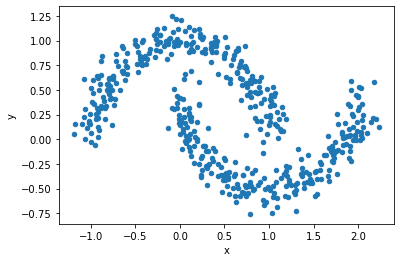

In [9]:
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
data, y = datasets.make_moons(n_samples=500,noise=0.1)
data = pd.DataFrame( data, columns=['x','y'] )
data.plot.scatter( x = 'x', y = 'y')

<AxesSubplot:xlabel='x', ylabel='y'>

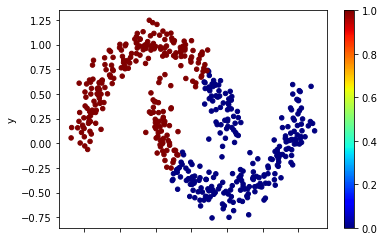

In [10]:
from sklearn.cluster import KMeans

model3 = KMeans( n_clusters = 2 )
model3.fit(data)

data.plot.scatter( x = 'x', y = 'y', c = model3.labels_, cmap = 'jet' )

<AxesSubplot:xlabel='x', ylabel='y'>

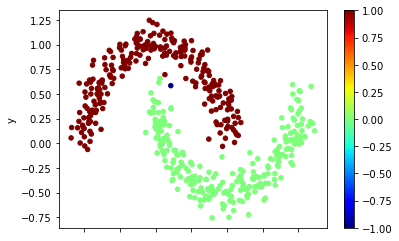

In [11]:
from sklearn.cluster import DBSCAN

model4 = DBSCAN( eps = 0.2, min_samples = 10 )
model4.fit( data )

data.plot.scatter( x = 'x', y = 'y', c = model4.labels_, cmap = 'jet' )